# Using the Julia Back-End to SIRS Correct Roman H4RG Data

Bernard.J.Rauscher@nasa.gov<br>
23 June 2021

This notebook shows how to use the Julia back end to SIRS correct one Roman file.

In [1]:
using SIRS
using FITSIO
using Plots
using JLD
using Revise

In [2]:
# Stage the data to Prism's fast storage
prism_fast = "/gpfsm/ccds01/nobackup/temp/brausche/"

# SIRS correct this file
file = prism_fast * "20190914_95k_1p1m0p1_noise_20663_005.fits"

# Get just the data
f = FITS(file, "r")
D = -Float64.(dropdims(read(f[2]), dims=4)) # Integrate up
close(f)

In [3]:
# Get saved SIRSCore for this detector, operating temperature, and bias voltage
sirs = restore(prism_fast * "2021-05-26T17:58:56_20663_95.0K_1.0V_SIRS.jld");

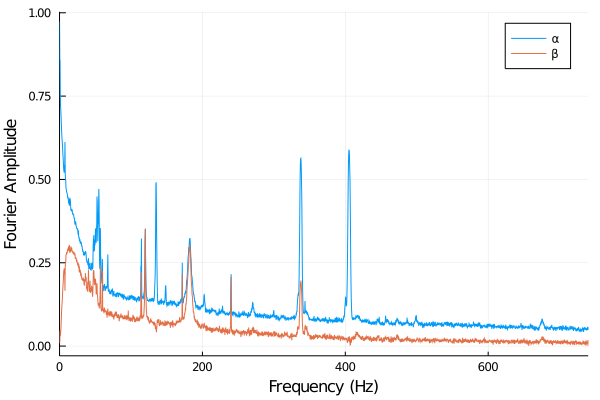

In [9]:
# Plot it up to show that it's reasonable. This step is optional.
# I'm just checking to be sure that the frequency dependent
# weights are in-family with my expectation.
plot(sirs.𝒇, abs.(sirs.α[:,1]), xlims=(0,740), label="α")
plot!(sirs.𝒇, abs.(sirs.β[:,1]), xlims=(0,740), label="β")
plot!(xlabel="Frequency (Hz)")
plot!(ylabel="Fourier Amplitude")

In [5]:
# SIRS correct the file. This is done in place.
# Use f_max to zero out high frequencies. This 
# value generally works OK with Roman Space Telescope
# IR arrays tested in the DCL
sirssub!(sirs, D, f_max=740.);

In [6]:
# Fit 2-parameter straight line.Λta have 60 samples
# up-the-ramp.
Λ = LegendreMatrices((60,2));

In [7]:
# Fit it
myfit = legfit(Λ, D);

In [8]:
# Save for examination using ds9
f = FITS("/att/gpfsfs/briskfs01/ppl/brausche/tmp/myfit.fits", "w")
write(f, myfit)
close(f)